# Data analysis

#### Imports

In [276]:
#sql
import mysql.connector
from mysql.connector import Error
import pymysql

#dataframe
import pandas as pd
import numpy as np
import re

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='mysql',
                             db='mydb')

In [46]:
cursor = connection.cursor()
cursor.execute("USE mydb")
cursor.execute("SHOW TABLES")
for x in cursor:
    print(x)

('attribute',)
('punk',)
('punk_attribute_relation',)
('skin',)
('transaction',)
('type',)


### Types of punks

In [101]:
try:
    query = """SELECT id, type_id  
               FROM punk;"""
    df_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [102]:
df_type.head(3)

,id,type_id
0,635,0
1,2890,0
2,3100,0


In [103]:
data = df_type.groupby(['type_id']).count()
data['type'] = data.index
data.head(3)

,id,type
type_id,,
0,9,0
1,24,1
2,88,2


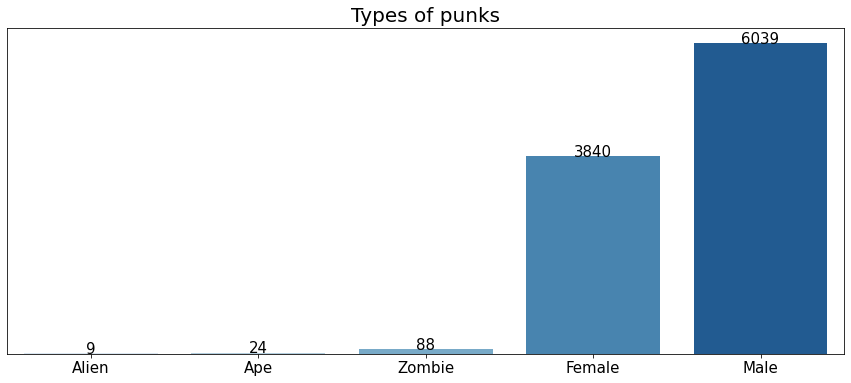

In [104]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="id", data=data, palette="Blues")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.id, row.id, color='black', ha="center",fontsize=15)

plt.title("Types of punks",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('6.png')
plt.show(a)

### Skins of punks

In [52]:
try:
    query = """SELECT id, skin_id FROM punk;"""
    df_skin = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [53]:
df_skin.head(3)

,id,skin_id
0,635,0
1,2890,0
2,3100,0


In [54]:
data = df_skin.groupby(['skin_id']).count()
data['skin'] = data.index
data

,id,skin
skin_id,,
0,9,0
1,24,1
2,88,2
3,1018,3
4,2824,4
5,3006,5
6,3031,6


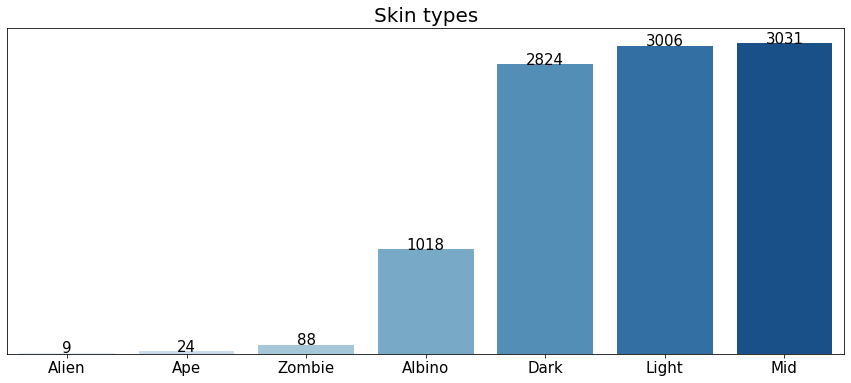

In [13]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="id", data=data, palette="Blues")

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.id, row.id, color='black', ha="center",fontsize=15)

plt.title("Skin types",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('7.png')
plt.show(a)

### Attributes of punks

In [56]:
try:
    query = """SELECT punk_id, attribute_id FROM punk_attribute_relation;"""
    df_att = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [57]:
df_att.head(3)

,punk_id,attribute_id
0,1,34
1,1,67
2,2,70


In [58]:
data = df_att.groupby(['punk_id']).size()
data = data.to_frame()
data.columns = ['total']

data = data.groupby(['total']).size()
data = data.to_frame()
data.columns = ['total']
data['att'] = data.index

new_row = {'total':8, 'att':0}
data = data.append(new_row, ignore_index=True)

data = data.sort_values(by=['att'])
data

,total,att
7,8,0
0,333,1
1,3560,2
2,4501,3
3,1420,4
4,166,5
5,11,6
6,1,7


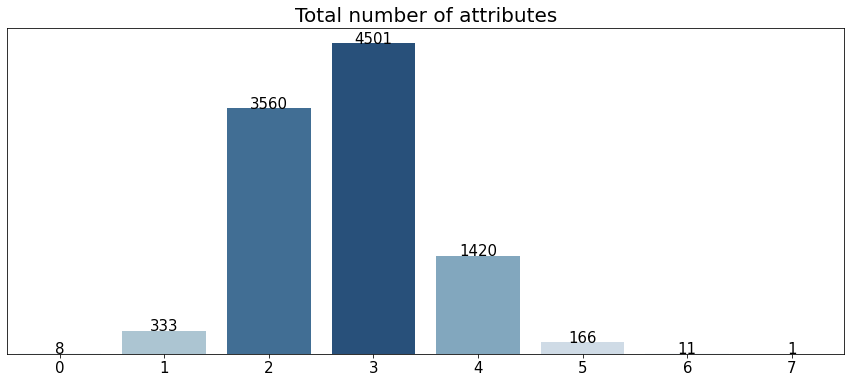

In [17]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="att", y="total", data=data, 
                palette=(["#F7FBFF","#A6C7D8","#336FA2","#1A5088",
                            "#78AAC8", "#CBDBEA","#F7FBFF","#F7FBFF"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.att, row.total, row.total, color='black', ha="center",fontsize=15)

plt.title("Total number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('8.png')
plt.show(a)

### Average price by type

In [108]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction;"""
    df_price_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [109]:
df_price_type.head(3)

,type,date,amount,punk_id
0,Bid,2021-09-01,321.0,0
1,Bid Withdrawn,2021-09-01,320.0,0
2,Bid,2021-09-01,320.0,0


In [110]:
#how many punks are there? 10000 good
len(df_price_type['punk_id'].unique())

10000

In [111]:
#locate all transaction sold
a = df_price_type.loc[df_price_type['type'] == 'Sold']
len(a['punk_id'])

19702

In [112]:
#keep only first item for each punk
b = a.drop_duplicates(subset=['punk_id'], keep='first')
len(b['punk_id'])

6500

In [113]:
b.head(3)

,type,date,amount,punk_id
21,Sold,2018-11-30,25.0,0
51,Sold,2020-11-30,60.0,1
305,Sold,2018-12-07,2.5,14


In [114]:
#only claimed
c = df_price_type.loc[(df_price_type['amount'] == 0) & (df_price_type['type'] == 'Claimed')]
len(c['punk_id'].unique())

10000

In [115]:
c.head(3)

,type,date,amount,punk_id
39,Claimed,2017-06-23,0.0,0
102,Claimed,2017-06-23,0.0,1
132,Claimed,2017-06-23,0.0,2


In [116]:
df_price_type = pd.concat([b, c], ignore_index=True)
df_price_type = df_price_type.sort_values(by=['punk_id','date'])
df_price_type = df_price_type.reset_index(drop=True)
df_price_type.tail(3)

,type,date,amount,punk_id
16497,Claimed,2017-06-23,0.0,9998
16498,Sold,2021-08-11,110.0,9998
16499,Claimed,2017-06-23,0.0,9999


In [117]:
#keep only first item for each punk
df_price_type = df_price_type.drop_duplicates(subset=['punk_id'], keep='last')
len(df_price_type['punk_id'])

10000

In [118]:
try:
    query = """SELECT id, type_id, skin_id FROM punk;"""
    df_punk = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [119]:
df_punk.head(3)

,id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5


In [120]:
df_punk.isnull().sum()

id         0
type_id    0
skin_id    0
dtype: int64

In [121]:
df_punk = df_punk.sort_values(by=['id'])
df_punk = df_punk.reset_index(drop=True)
df_punk.head(3)

,id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5


In [122]:
df_punk = df_punk.rename(columns={'id':'punk_id'})
df_punk.head()

,punk_id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5
3,3,4,4
4,4,4,6


In [123]:
df_price_type = pd.merge(df_price_type, df_punk, on=["punk_id"])
df_price_type.head(3)

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.0,0,3,6
1,Sold,2020-11-30,60.0,1,4,4
2,Claimed,2017-06-23,0.0,2,3,5


In [124]:
data = df.groupby(['type_id']).mean()
data['type'] = data.index
data

,punk_id,skin_id,type
type_id,,,
0,4801.222222,0.000000,0
1,4830.291667,1.000000,1
2,5280.602273,2.000000,2
3,4915.416146,4.800260,3
4,5049.837887,4.824143,4


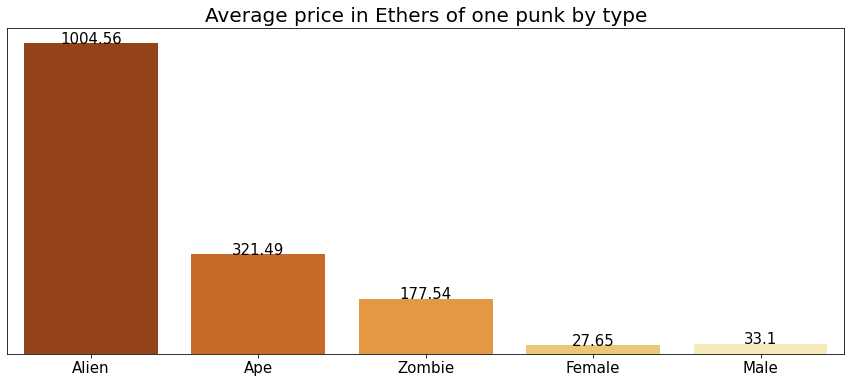

In [80]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="amount", data=data, palette="YlOrBr_r")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of one punk by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('9.png')
plt.show(a)

### Average price by skin

In [81]:
data = df.groupby(['skin_id']).mean()
data['skin'] = data.index
data

,amount,punk_id,type_id,skin
skin_id,,,,
0,1004.555556,4801.222222,0.000000,0
1,321.491250,4830.291667,1.000000,1
2,177.537045,5280.602273,2.000000,2
3,31.734381,5176.261297,3.587426,3
4,30.569593,4933.063031,3.610127,4
5,32.024558,5043.211910,3.619095,5
6,30.081085,4952.448037,3.612669,6


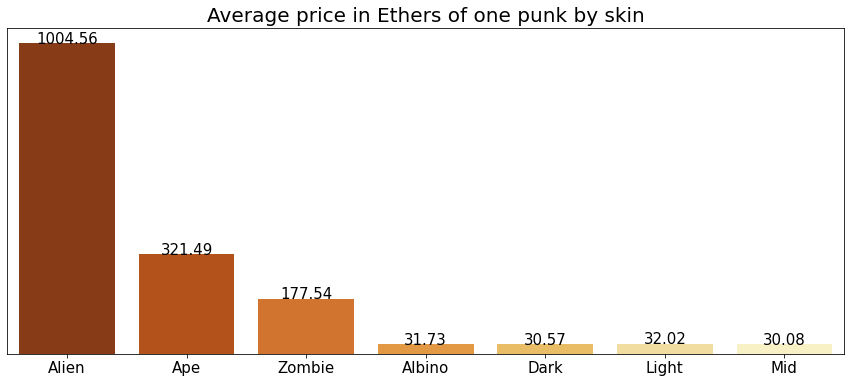

In [82]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="amount", data=data, palette="YlOrBr_r")

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of one punk by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('10.png')
plt.show(a)

### Average price by attribute

In [93]:
try:
    query = """SELECT punk_id, attribute_id FROM punk_attribute_relation;"""
    df_att = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [94]:
df = df_punk.sort_values(by=['punk_id'])
df = df_punk.reset_index(drop=True)
df.head()

,punk_id,type_id,skin_id
0,0,3,6
1,1,4,4
2,2,3,5
3,3,4,4
4,4,4,6


In [95]:
df_att.head()

,punk_id,attribute_id
0,1,34
1,1,67
2,2,70
3,3,70
4,3,80


In [96]:
df_dummies = pd.get_dummies(df_att, columns=['attribute_id'])
df_dummies.head(3)

,punk_id,attribute_id_0,attribute_id_1,attribute_id_2,attribute_id_3,attribute_id_4,attribute_id_5,attribute_id_6,attribute_id_7,attribute_id_8,...,attribute_id_77,attribute_id_78,attribute_id_79,attribute_id_80,attribute_id_81,attribute_id_82,attribute_id_83,attribute_id_84,attribute_id_85,attribute_id_86
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_attributes = df_dummies.groupby(['punk_id']).count()
df_attributes = df_attributes[['attribute_id_0']]
df_attributes['punk_id'] = df_attributes.index
df_attributes = df_attributes.rename(columns={'attribute_id_0':'total_att'})
df_attributes = df_attributes.reset_index(drop=True)
df_attributes.head(3)

,total_att,punk_id
0,3,0
1,2,1
2,1,2


In [153]:
len(df_attributes)

9992

In [154]:
new_row = {'total_att':0, 'punk_id':281}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':510}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':641}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':741}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':1050}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':2204}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':3307}
df_attributes = df_attributes.append(new_row, ignore_index=True)
new_row = {'total_att':0, 'punk_id':6487}
df_attributes = df_attributes.append(new_row, ignore_index=True)
len(df_attributes)

10000

In [155]:
len(df_attributes['punk_id'].unique())

10000

In [156]:
df_price_type.head()

,type,date,amount,punk_id,type_id,skin_id
0,Sold,2018-11-30,25.0,0,3,6
1,Sold,2020-11-30,60.0,1,4,4
2,Claimed,2017-06-23,0.0,2,3,5
3,Claimed,2017-06-23,0.0,3,4,4
4,Claimed,2017-06-23,0.0,4,4,6


In [157]:
df_price = pd.merge(df_attributes, df_price_type, on=["punk_id"])
df_price.head(5)

,total_att,punk_id,type,date,amount,type_id,skin_id
0,3,0,Sold,2018-11-30,25.0,3,6
1,2,1,Sold,2020-11-30,60.0,4,4
2,1,2,Claimed,2017-06-23,0.0,3,5
3,3,3,Claimed,2017-06-23,0.0,4,4
4,4,4,Claimed,2017-06-23,0.0,4,6


In [158]:
data = df_price.groupby(['total_att']).mean()
data['total_att'] = data.index
data

,punk_id,amount,type_id,skin_id,total_att
total_att,,,,,
0,1902.625000,95.628750,3.500000,4.500000,0
1,2479.561562,47.336216,3.357357,4.378378,1
2,4382.905337,33.775444,3.571629,4.690449,2
3,5454.828927,33.333959,3.604310,4.838480,3
4,5643.367606,30.231014,3.621127,4.876761,4
5,5561.036145,45.206687,3.662651,4.897590,5
6,4881.363636,103.063636,3.454545,4.727273,6
7,8348.000000,85.000000,4.000000,6.000000,7


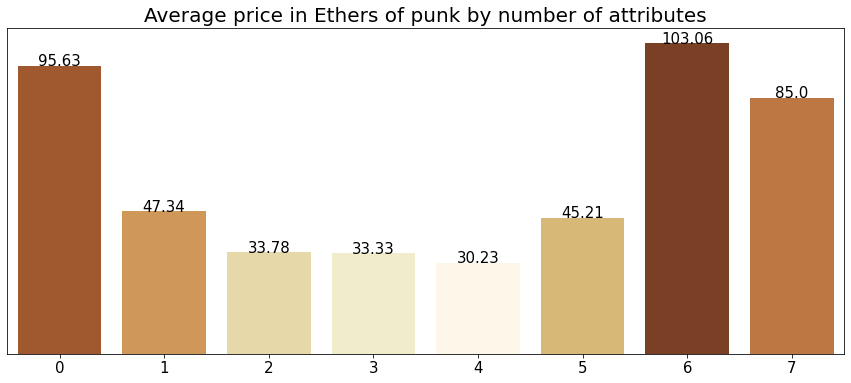

In [131]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="total_att", y="amount", data=data,
                palette=(["#B3531B",
                          "#E39844",
                          "#F1DDA0",
                          "#F7F1C5",
                          "#FFF9E5", 
                          "#E8BD66",
                          "#873B17",
                          "#D1742F"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.total_att, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Average price in Ethers of punk by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('11.png')
plt.show(a)

### Punks available by types

In [132]:
try:
    query = """SELECT type, date, amount, punk_id, type_id, skin_id
    FROM transaction
    INNER JOIN punk ON punk.id=transaction.punk_id;"""
    df_available = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [133]:
df_available.head()

,type,date,amount,punk_id,type_id,skin_id
0,Bid,2021-09-01,321.0,0,3,6
1,Bid Withdrawn,2021-09-01,320.0,0,3,6
2,Bid,2021-09-01,320.0,0,3,6
3,Bid Withdrawn,2021-09-01,263.0,0,3,6
4,Bid,2021-08-29,263.0,0,3,6


In [135]:
#locate all transaction sold
a = df_available.loc[df_available['type'] == 'Offered']
len(a)

71062

In [136]:
#keep only first item for each punk
b = a.drop_duplicates(subset=['punk_id'], keep='first')
len(b['punk_id'])

7013

In [137]:
data = b.groupby(['type_id']).count()
data['type_id'] = data.index
data

,type,date,amount,punk_id,skin_id,type_id
type_id,,,,,,
0,6,6,6,6,6,0
1,18,18,18,18,18,1
2,52,52,52,52,52,2
3,2482,2482,2482,2482,2482,3
4,4455,4455,4455,4455,4455,4


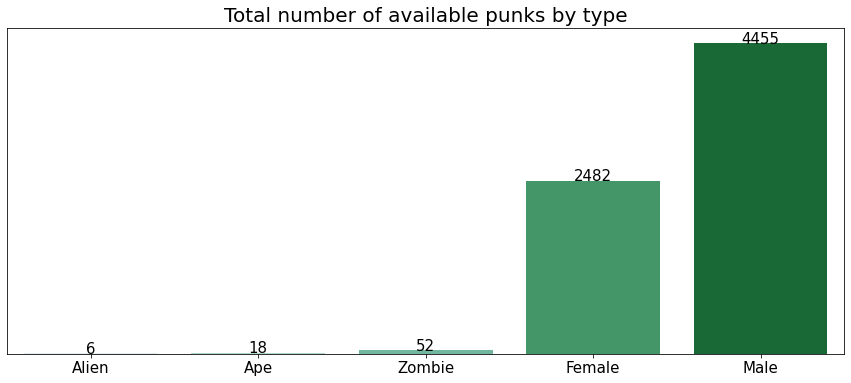

In [145]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type_id", y="amount", data=data, palette="BuGn")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type_id, row.amount,row.amount, color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('12.png')
plt.show(a)

### Punks available by skin

In [146]:
data = b.groupby(['skin_id']).count()
data['skin_id'] = data.index
data

,type,date,amount,punk_id,type_id,skin_id
skin_id,,,,,,
0,6,6,6,6,6,0
1,18,18,18,18,18,1
2,52,52,52,52,52,2
3,638,638,638,638,638,3
4,2019,2019,2019,2019,2019,4
5,2145,2145,2145,2145,2145,5
6,2135,2135,2135,2135,2135,6


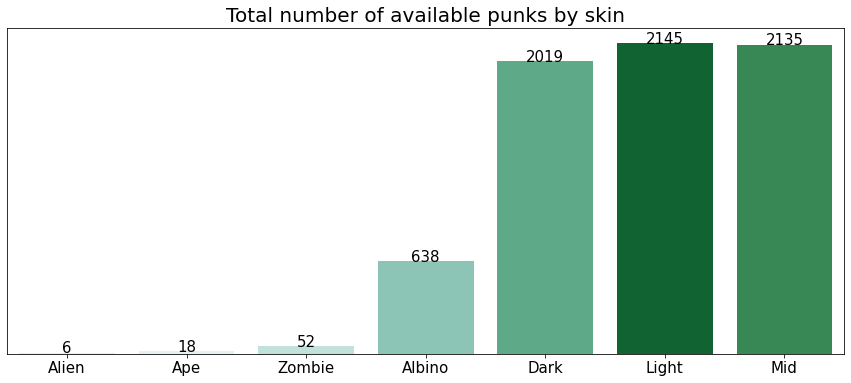

In [148]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin_id", y="amount", data=data, 
                palette=(["#E1F3F6",
                          "#E1F3F6",
                          "#BDE6DD",
                          "#83CEB9",
                          "#51B689", 
                          "#04712F",
                          "#2B9553"]))

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin_id, row.amount,row.amount, color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('13.png')
plt.show(a)

### Punks available by attribute

In [149]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type='Offered';"""
    df_offered = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [150]:
df_offered.tail()

,type,date,amount,punk_id
71057,Offered,2020-10-26,10.50,8998
71058,Offered,2020-10-12,29.99,8998
71059,Offered,2020-10-06,12.00,8998
71060,Offered,2018-05-29,0.10,8998
71061,Offered,2017-07-21,6.50,8999


In [151]:
#keep only first item for each punk
df_offered = df_offered.drop_duplicates(subset=['punk_id'], keep='first')
len(df_offered['punk_id'])

7013

In [159]:
df_attributes.head()

,total_att,punk_id
0,3,0
1,2,1
2,1,2
3,3,3
4,4,4


In [160]:
df_offered = pd.merge(df_attributes, df_offered, on=["punk_id"])
df_offered.head(5)

,total_att,punk_id,type,date,amount
0,3,0,Offered,2018-09-12,100.00
1,2,1,Offered,2020-11-25,79.50
2,3,14,Offered,2021-09-14,667.00
3,2,53,Offered,2021-08-03,129.99
4,1,89,Offered,2021-03-16,890.00


In [161]:
data = df_offered.groupby(['total_att']).count()
data['total_att'] = data.index
data

,punk_id,type,date,amount,total_att
total_att,,,,,
0,7,7,7,7,0
1,125,125,125,125,1
2,2458,2458,2458,2458,2
3,3310,3310,3310,3310,3
4,996,996,996,996,4
5,110,110,110,110,5
6,6,6,6,6,6
7,1,1,1,1,7


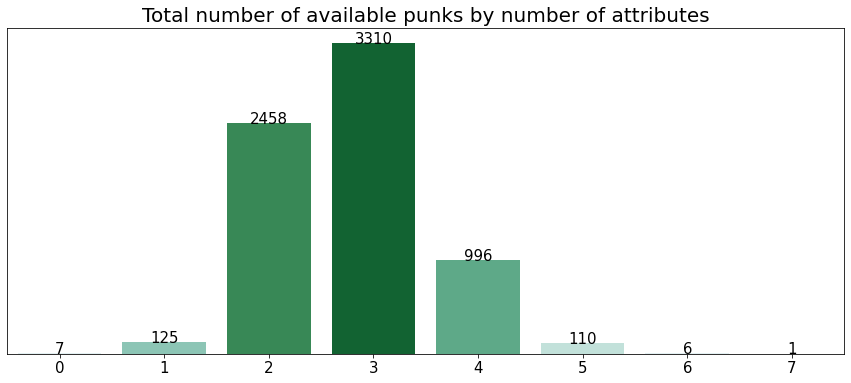

In [162]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="total_att", y="amount", data=data,
                palette=(["#E1F3F6","#83CEB9","#2B9553","#04712F",
                            "#51B689", "#BDE6DD","#E1F3F6","#E1F3F6"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.total_att, row.amount,round(row.amount,2), color='black', ha="center",fontsize=15)

plt.title("Total number of available punks by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('14.png')
plt.show(a)

### Average rarest rank of punk character by type

In [167]:
try:
    query = """SELECT id, type_id, rarest_rank FROM punk;"""
    df_rank_type = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [168]:
df_rank_type.head()

,id,type_id,rarest_rank
0,0,3,2118
1,1,4,4337
2,2,3,7995
3,3,4,7834
4,4,4,7189


In [169]:
data = df_rank_type.groupby(['type_id']).mean()
data['type'] = data.index
data

,id,rarest_rank,type
type_id,,,
0,4801.222222,6.444444,0
1,4830.291667,31.291667,1
2,5280.602273,97.477273,2
3,4915.416146,4356.071354,3
4,5049.837887,5508.908594,4


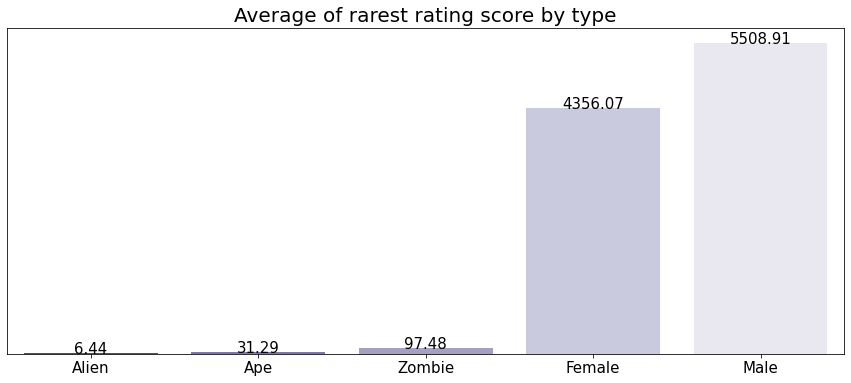

In [171]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="type", y="rarest_rank", data=data, palette="Purples_r")

a.set_xticklabels(['Alien','Ape','Zombie','Female','Male'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.type, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('15.png')
plt.show(a)

### Average rarest rank of punk character by skin

In [172]:
try:
    query = """SELECT id, skin_id, rarest_rank FROM punk;"""
    df_rank_skin = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [173]:
df_rank_skin.head()

,id,skin_id,rarest_rank
0,0,6,2118
1,1,4,4337
2,2,5,7995
3,3,4,7834
4,4,6,7189


In [174]:
data = df_rank_skin.groupby(['skin_id']).mean()
data['skin'] = data.index
data

,id,rarest_rank,skin
skin_id,,,
0,4801.222222,6.444444,0
1,4830.291667,31.291667,1
2,5280.602273,97.477273,2
3,5176.261297,5290.792731,3
4,4933.063031,5028.281516,4
5,5043.211910,5046.019960,5
6,4952.448037,5028.499835,6


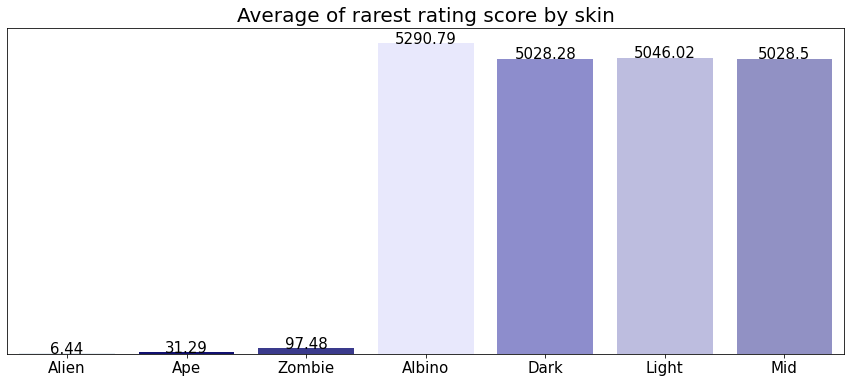

In [176]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="skin", y="rarest_rank", data=data,
                palette=(["#E4EDF5",
                          "#010080",
                          "#2D2D99",
                          "#E5E5FF",
                          "#8282D6", 
                          "#B7B7E5",
                          "#8989CC"]))

a.set_xticklabels(['Alien','Ape','Zombie','Albino','Dark','Light','Mid'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.skin, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('16.png')
plt.show(a)

### Average rarest rank of punk character by attribute

In [188]:
df_attributes.head()

,total_att,punk_id
0,3,0
1,2,1
2,1,2
3,3,3
4,4,4


In [191]:
len(df_attributes['punk_id'].unique())

10000

In [189]:
try:
    query = """SELECT id, rarest_rank FROM punk;"""
    df_rank = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [190]:
df_rank.head()

,id,rarest_rank
0,0,2118
1,1,4337
2,2,7995
3,3,7834
4,4,7189


In [192]:
df_rank = df_rank.rename(columns={'id':'punk_id'})
df_rank.head()

,punk_id,rarest_rank
0,0,2118
1,1,4337
2,2,7995
3,3,7834
4,4,7189


In [193]:
df_rank_att = pd.merge(df_rank, df_attributes, on=["punk_id"])
df_rank_att.head(5)

,punk_id,rarest_rank,total_att
0,0,2118,3
1,1,4337,2
2,2,7995,1
3,3,7834,3
4,4,7189,4


In [194]:
data = df_rank_att.groupby(['total_att']).mean()
data['att'] = data.index
data

,punk_id,rarest_rank,att
total_att,,,
0,1902.625000,22.500000,0
1,2479.561562,4500.477477,1
2,4382.905337,5250.500843,2
3,5454.828927,5049.341257,3
4,5643.367606,4540.291549,4
5,5561.036145,3852.710843,5
6,4881.363636,48.000000,6
7,8348.000000,1.000000,7


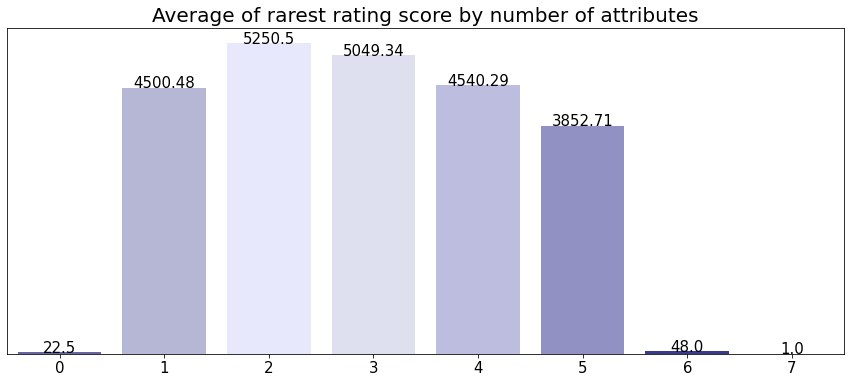

In [195]:
plt.figure(figsize =(15, 6))
a = sns.barplot(x="att", y="rarest_rank", data=data, 
                palette=(["#5B5BB2",
                          "#B0B2D9",
                          "#E5E5FF",
                          "#DCDEF2",
                          "#B7B7E5", 
                          "#8989CC",
                          "#2D2D99",
                          "#8487BF"]))

a.set_xticklabels(['0','1','2','3','4','5','6','7'],fontsize=15)
a.set(yticklabels=[])
a.set(ylabel=None)
a.tick_params(left=False)

for index, row in data.iterrows():
    a.text(row.att, row.rarest_rank, round(row.rarest_rank,2), color='black', ha="center",fontsize=15)

plt.title("Average of rarest rating score by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('17.png')
plt.show(a)

### Evolution of transactions

In [400]:
try:
    query = """SELECT type, date, amount, punk_id 
    FROM transaction
    WHERE type = 'Bid' OR type = 'Offered' OR type = 'Sold';"""
    df_transactions = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [401]:
df_transactions.head()

,type,date,amount,punk_id
0,Bid,2021-09-01,321.0,0
1,Bid,2021-09-01,320.0,0
2,Bid,2021-08-29,263.0,0
3,Bid,2021-04-11,250.0,0
4,Bid,2021-02-20,100.0,0


In [402]:
df_sold = df_transactions.loc[df_transactions['type'] == 'Sold']
df_sold = df_sold.sort_values(by=['date'])
df_sold = df_sold.reset_index(drop=True)

df_bid = df_transactions.loc[df_transactions['type'] == 'Bid']
df_bid = df_bid.sort_values(by=['date'])
df_bid = df_bid.reset_index(drop=True)

df_offered = df_transactions.loc[df_transactions['type'] == 'Offered']
df_offered = df_offered.sort_values(by=['date'])
df_offered = df_offered.reset_index(drop=True)

In [403]:
df_sold.nlargest(3, 'amount')

,type,date,amount,punk_id
10666,Sold,2021-03-11,4200.0,7804
10669,Sold,2021-03-11,4200.0,3100
19614,Sold,2021-12-09,2500.0,4156


In [404]:
df_bid.nlargest(3, 'amount')

,type,date,amount,punk_id
15152,Bid,2021-03-11,4200.0,3100
17196,Bid,2021-04-02,3100.0,3443
17201,Bid,2021-04-02,3000.0,3443


In [405]:
df_offered['amount'].max()

90000000000000.0

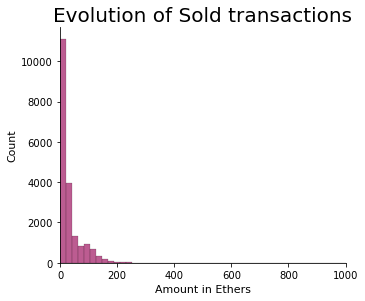

In [383]:
sns.displot(x = df_sold['amount'],bins=200,fill=True, color='#A6266C',height=4,aspect=5/4)
plt.xlim(0, 1000)
plt.title("Evolution of Sold transactions",fontsize=20)
plt.xlabel("Amount in Ethers",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('18.png',bbox_inches='tight')
plt.show()

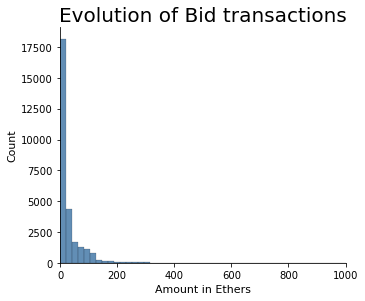

In [384]:
sns.displot(x = df_bid['amount'],bins=200,fill=True, color='#2D689C',height=4,aspect=5/4)
plt.xlim(0, 1000)
plt.title("Evolution of Bid transactions",fontsize=20)
plt.xlabel("Amount in Ethers",fontsize=11)
plt.ylabel("Count",fontsize=11)
plt.savefig('19.png',bbox_inches='tight')
plt.show()

### Evolution of average price of punk by type

In [116]:
try:
    query = """SELECT transaction.type, transaction.date, transaction.amount, transaction.punk_id, punk.type_id 
    FROM transaction
    INNER JOIN punk ON punk.id=transaction.punk_id;"""
    df18 = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [117]:
df18.head()

,type,date,amount,punk_id,type_id
0,Bid Withdrawn,2021-12-04,2300.00,635,0
1,Offered,2021-11-10,23000.00,635,0
2,Bid,2021-11-10,2300.00,635,0
3,Bid Withdrawn,2021-11-08,0.09,635,0
4,Bid,2021-11-08,0.09,635,0


In [118]:
#how many punks are there? 10000 good
len(df18['punk_id'].unique())

10000

In [119]:
#locate all transaction sold
df19 = df18.loc[df18['type'] == 'Sold']
#len(df19['punk_id'])
df19.head()

,type,date,amount,punk_id,type_id
98,Sold,2021-01-23,605.0,2890,0
112,Sold,2017-07-06,8.0,2890,0
135,Sold,2021-03-11,4200.0,3100,0
156,Sold,2017-07-06,8.0,3100,0
248,Sold,2017-07-10,8.0,5822,0


In [120]:
df20 = df19.loc[df19['type_id'] == 0]
df20 = df20.sort_values(by=['date'])
df20 = df20.reset_index(drop=True)

df21 = df19.loc[df19['type_id'] == 1]
df21 = df21.sort_values(by=['date'])
df21 = df21.reset_index(drop=True)

df22 = df19.loc[df19['type_id'] == 2]
df22 = df22.sort_values(by=['date'])
df22 = df22.reset_index(drop=True)

df23 = df19.loc[df19['type_id'] == 3]
df23 = df23.sort_values(by=['date'])
df23 = df23.reset_index(drop=True)

df24 = df19.loc[df19['type_id'] == 4]
df24 = df24.sort_values(by=['date'])
df24 = df24.reset_index(drop=True)

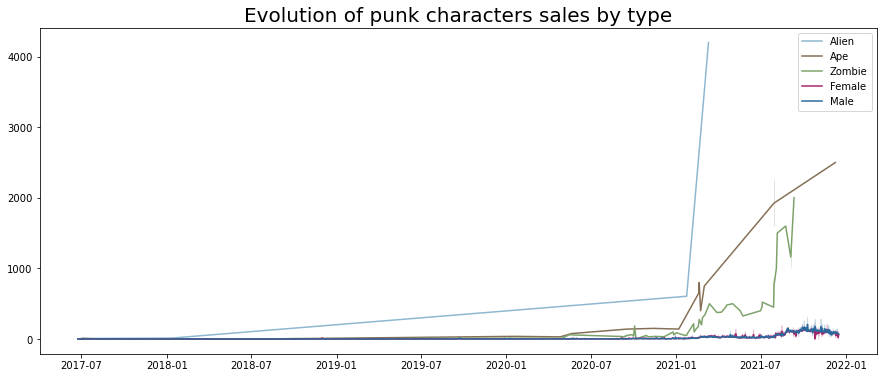

In [121]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df20['date'],y=df20['amount'], color='#8DB8D0',label='Alien')
sns.lineplot(x=df21['date'],y=df21['amount'], color='#856F55',label='Ape')
sns.lineplot(x=df22['date'],y=df22['amount'], color='#7DA269',label='Zombie')
sns.lineplot(x=df23['date'],y=df23['amount'], color='#A6266C',label='Female')
sns.lineplot(x=df24['date'],y=df24['amount'], color='#2D689C',label='Male')

plt.title("Evolution of punk characters sales by type",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('18.png')
plt.show()

### Evolution of average price of punk by skin

In [35]:
try:
    query = """SELECT transaction.type, transaction.date, transaction.amount, transaction.punk_id, punk.skin_id 
    FROM transaction
    INNER JOIN punk ON punk.id=transaction.punk_id;"""
    df25 = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [36]:
df25.head()

,type,date,amount,punk_id,skin_id
0,Bid Withdrawn,2021-12-04,2300.00,635,0
1,Offered,2021-11-10,23000.00,635,0
2,Bid,2021-11-10,2300.00,635,0
3,Bid Withdrawn,2021-11-08,0.09,635,0
4,Bid,2021-11-08,0.09,635,0


In [37]:
#how many punks are there? 10000 good
len(df25['punk_id'].unique())

10000

In [38]:
#locate all transaction sold
df26 = df25.loc[df25['type'] == 'Sold']
#len(df19['punk_id'])
df26.head()

,type,date,amount,punk_id,skin_id
98,Sold,2021-01-23,605.0,2890,0
112,Sold,2017-07-06,8.0,2890,0
135,Sold,2021-03-11,4200.0,3100,0
156,Sold,2017-07-06,8.0,3100,0
248,Sold,2017-07-10,8.0,5822,0


In [43]:
df27 = df26.loc[df26['skin_id'] == 0]
df27 = df27.sort_values(by=['date'])
df27 = df27.reset_index(drop=True)

df28 = df26.loc[df26['skin_id'] == 1]
df28 = df28.sort_values(by=['date'])
df28 = df28.reset_index(drop=True)

df29 = df26.loc[df26['skin_id'] == 2]
df29 = df29.sort_values(by=['date'])
df29 = df29.reset_index(drop=True)

df30 = df26.loc[df26['skin_id'] == 3]
df30 = df30.sort_values(by=['date'])
df30 = df30.reset_index(drop=True)

df31 = df26.loc[df26['skin_id'] == 4]
df31 = df31.sort_values(by=['date'])
df31 = df31.reset_index(drop=True)

df32 = df26.loc[df26['skin_id'] == 5]
df32 = df32.sort_values(by=['date'])
df32 = df32.reset_index(drop=True)

df33 = df26.loc[df26['skin_id'] == 6]
df33 = df33.sort_values(by=['date'])
df33 = df33.reset_index(drop=True)

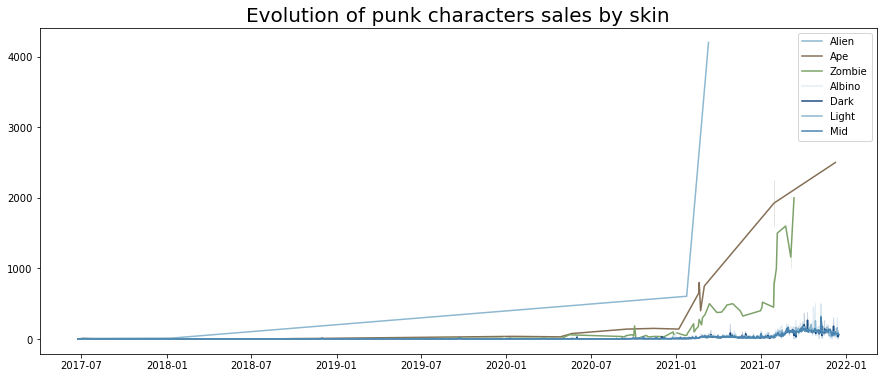

In [122]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df27['date'],y=df27['amount'], color='#8DB8D0',label='Alien')
sns.lineplot(x=df28['date'],y=df28['amount'], color='#856F55',label='Ape')
sns.lineplot(x=df29['date'],y=df29['amount'], color='#7DA269',label='Zombie')
sns.lineplot(x=df30['date'],y=df30['amount'], color='#E4EDF5',label='Albino')
sns.lineplot(x=df31['date'],y=df31['amount'], color='#1A4D84',label='Dark')
sns.lineplot(x=df32['date'],y=df32['amount'], color='#8DB8D0',label='Light')
sns.lineplot(x=df33['date'],y=df33['amount'], color='#4884AF',label='Mid')

plt.title("Evolution of punk characters sales by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('19.png')
plt.show()

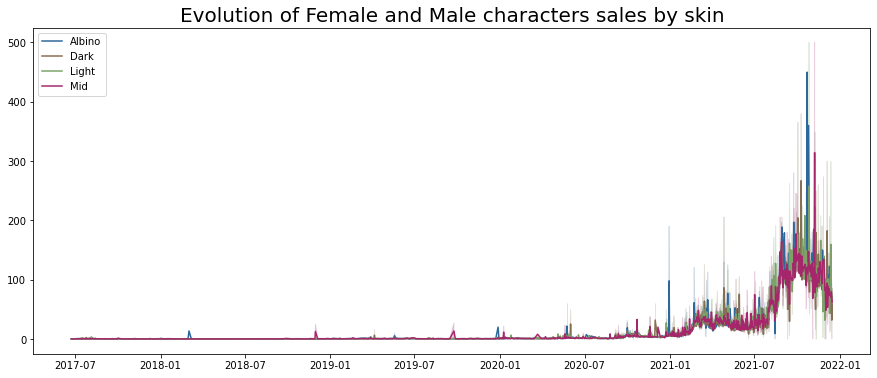

In [123]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df30['date'],y=df30['amount'], color='#2D689C',label='Albino')
sns.lineplot(x=df31['date'],y=df31['amount'], color='#856F55',label='Dark')
sns.lineplot(x=df32['date'],y=df32['amount'], color='#7DA269',label='Light')
sns.lineplot(x=df33['date'],y=df33['amount'], color='#A6266C',label='Mid')

plt.title("Evolution of Female and Male characters sales by skin",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('20.png')
plt.show()

### Evolution of price of punk by attributes

In [93]:
df9.head(5)

,total_att,punk_id,type,date,amount,type_id,skin_id
0,3,0,Sold,2018-11-30,25.0,3,6
1,2,1,Sold,2020-11-30,60.0,4,4
2,1,2,Claimed,2017-06-23,0.0,3,5
3,3,3,Claimed,2017-06-23,0.0,4,4
4,4,4,Claimed,2017-06-23,0.0,4,6


In [100]:
df34 = df9.loc[df9['total_att'] == 0]
df34 = df34.sort_values(by=['date'])
df34 = df34.reset_index(drop=True)

df35 = df9.loc[df9['total_att'] == 1]
df35 = df35.sort_values(by=['date'])
df35 = df35.reset_index(drop=True)

df36 = df9.loc[df9['total_att'] == 2]
df36 = df36.sort_values(by=['date'])
df36 = df36.reset_index(drop=True)

df37 = df9.loc[df9['total_att'] == 3]
df37 = df37.sort_values(by=['date'])
df37 = df37.reset_index(drop=True)

df38 = df9.loc[df9['total_att'] == 4]
df38 = df38.sort_values(by=['date'])
df38 = df38.reset_index(drop=True)

df39 = df9.loc[df9['total_att'] == 5]
df39 = df39.sort_values(by=['date'])
df39 = df39.reset_index(drop=True)

df40 = df9.loc[df9['total_att'] == 6]
df40 = df40.sort_values(by=['date'])
df40 = df40.reset_index(drop=True)

df41 = df9.loc[df9['total_att'] == 7]
df41 = df41.sort_values(by=['date'])
df41 = df41.reset_index(drop=True)

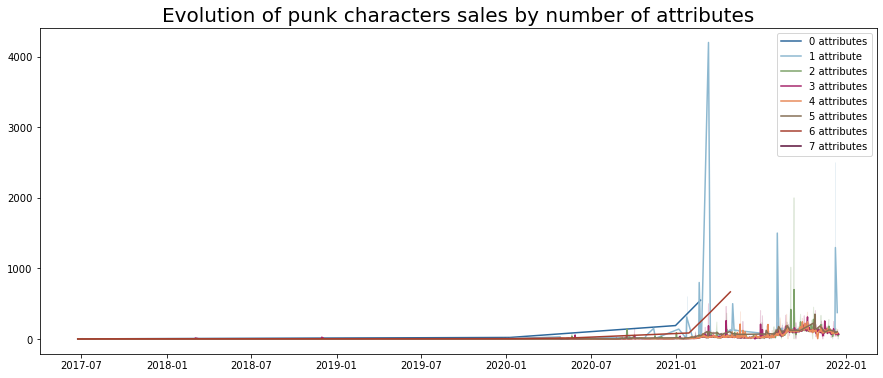

In [124]:
#scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df34['date'],y=df34['amount'], color='#2D689C',label='0 attributes')
sns.lineplot(x=df35['date'],y=df35['amount'], color='#8DB8D0',label='1 attribute')
sns.lineplot(x=df36['date'],y=df36['amount'], color='#7DA269',label='2 attributes')
sns.lineplot(x=df37['date'],y=df37['amount'], color='#A6266C',label='3 attributes')
sns.lineplot(x=df38['date'],y=df38['amount'], color='#E88A5A',label='4 attributes')
sns.lineplot(x=df39['date'],y=df39['amount'], color='#856F55',label='5 attributes')
sns.lineplot(x=df40['date'],y=df40['amount'], color='#A63E2E',label='6 attributes')
sns.lineplot(x=df41['date'],y=df41['amount'], color='#590C36',label='7 attributes')

plt.title("Evolution of punk characters sales by number of attributes",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('21.png')
plt.show()

### Price range distribution

In [74]:
try:
    query = """SELECT transaction.type, transaction.date, transaction.amount, transaction.punk_id 
    FROM transaction;"""
    df42 = pd.read_sql(query,connection)
except Exception as e:
    cursor.close()
    print(str(e))

In [75]:
df42.head()

,type,date,amount,punk_id
0,Bid,2021-09-01,321.0,0
1,Bid Withdrawn,2021-09-01,320.0,0
2,Bid,2021-09-01,320.0,0
3,Bid Withdrawn,2021-09-01,263.0,0
4,Bid,2021-08-29,263.0,0


In [76]:
#locate all transaction sold
a = df42.loc[df42['type'] == 'Sold']

#only claimed
b = df42.loc[(df42['amount'] == 0) & (df42['type'] == 'Claimed')]

#locate all transaction bid
c = df42.loc[df42['type'] == 'Bid']

#locate all transaction bid
d = df42.loc[df42['type'] == 'Offered']

df43 = pd.concat([a, b, c, d], ignore_index=True)
df43 = df43.sort_values(by=['punk_id','date'])
df43 = df43.reset_index(drop=True)
df43.tail(10)

,type,date,amount,punk_id
120138,Bid,2018-10-31,0.50,9999
120139,Bid,2019-12-20,0.75,9999
120140,Bid,2020-01-10,2.50,9999
120141,Bid,2020-12-14,0.01,9999
120142,Bid,2021-02-14,0.06,9999
120143,Bid,2021-03-16,0.10,9999
120144,Bid,2021-04-20,17.50,9999
120145,Bid,2021-04-27,0.10,9999
120146,Bid,2021-05-12,0.22,9999
120147,Bid,2021-08-01,10.00,9999


In [105]:
df_sold = df43.loc[df43['type'] == 'Sold']
df_sold = df_sold.sort_values(by=['date'])
df_sold = df_sold.reset_index(drop=True)

df_bid = df43.loc[df43['type'] == 'Bid']
df_bid = df_bid.sort_values(by=['date'])
df_bid = df_bid.reset_index(drop=True)

df_offered = df43.loc[df43['type'] == 'Offered']
df_offered = df_offerd.sort_values(by=['date'])
df_offered = df_offerd.reset_index(drop=True)

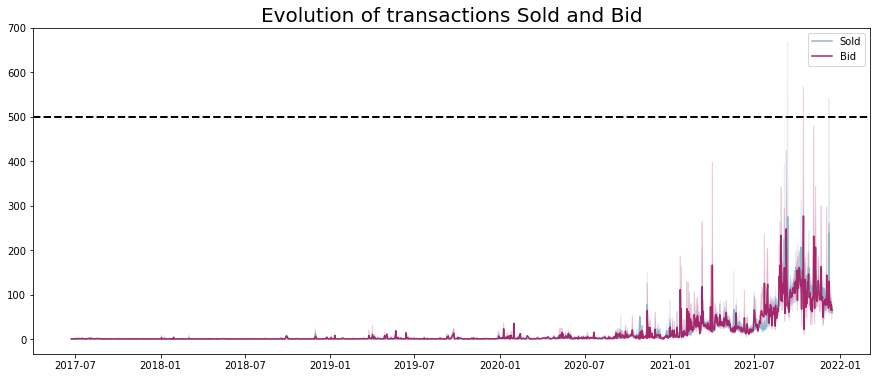

In [116]:
# scatterplot
plt.figure(figsize =(15, 6))
sns.lineplot(x=df_sold['date'],y=df_sold['amount'], color='#8DB8D0',label='Sold')
sns.lineplot(x=df_bid['date'],y=df_bid['amount'], color='#A6266C',label='Bid')

plt.title("Evolution of transactions Sold and Bid",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('22.png')
plt.axhline(y=500, linewidth=2, color = 'k', linestyle='dashed')
plt.show()

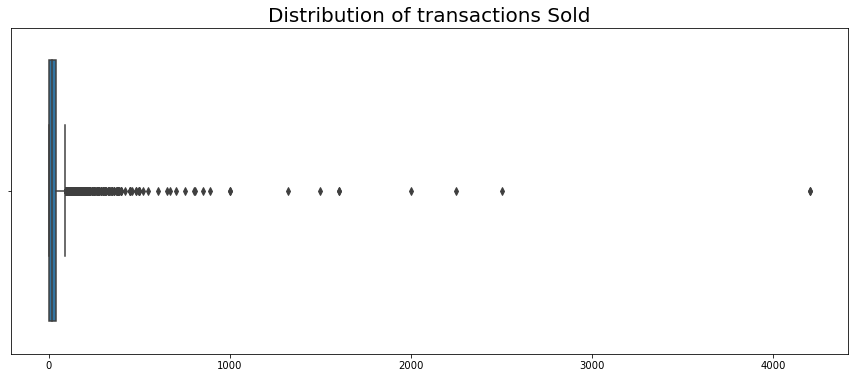

In [119]:
plt.figure(figsize =(15, 6))
sns.boxplot(x=df_sold["amount"])
plt.title("Distribution of transactions Sold",fontsize=20)
plt.xlabel("")
plt.ylabel("")
plt.savefig('23.png')
plt.show()